## Credit Card Fraud Detection

In this module, we will learn how to implement machine learning based Credit Card Fraud Detection. So far, we have learned many supervised and unsupervised machine learning algorithm and now this is the time to see their practical implementation.

## 1. Project Goal

Credit card companies shall be able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.



## 2. Data set Description 

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,315 transactions. It has 30 input features and 1 target variable. The dataset is highly unbalanced, the positive class (frauds) account for 0.173% of all transactions.

The data set is publicly available at https://www.kaggle.com/mlg-ulb/creditcardfraud/home



Due to confidentiality issues, Kaggle doesn’t provide the background information about the 28 features out of 30. The only Features defined are ‘Time’ and ‘Amount’. ‘Time’ contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature ‘Amount’ is the Transaction Amount. ‘Class’ is the target variable and it is 1 in case of fraud and 0 otherwise

In [2]:
#Import the external libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the dataset from the csv file using pandas.
data = pd.read_csv("F:/Data set Python/Credit card fraud detection/creditcard/creditcard.csv")

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Cleansing

We have identified the input features and the target variable so we will separate them into two objects "X" and "y" and draw the histogram of all the input features to see the data at a glance.

NOTE :- We have a limitation to display histogram plot, so I will display only 9 subplots instead of 29 plots.

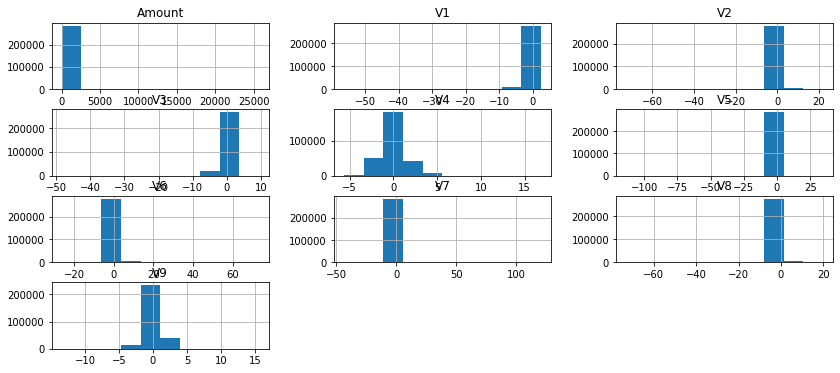

In [4]:
#Only use the "Amount" and "V1",..."V28" features.
features = ["V%d" % number for number in range(1,10)] + ["Amount"]

#In above, I used "10" to limit the subplots but actually we have to use "29"

#The target variables which we would like to predict, is the "Class" variable.
target = "Class"

#Now we will create an X variable (containing the features) & an y variable 
#(containing only the target variable)
X = data[features]
y = data[target]

#Plot histogram of each parameter
X.hist(figsize = (14,6))
plt.show()

In [5]:
#X = data.drop(["Class"], axis = 1)
#y = data["Class"]

#print(X.shape)
#print(y.shape)

#xData = X.values
#yData = y.values

In [6]:
X.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,88.349619
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,250.120109
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,5.600000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,22.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,77.165000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,25691.160000


In above, you can notice that all the variable are not at the same scale and distribution. Some of the variables have a wide range of values (like the Amount variable). Machine learning algorithms can’t estimate correct output without the standard normally distributed data. We will use StandardScaler function from scikit-learn to standardize our data.

NOTE : We have a limitation to display histogram plot, so I will display only 4 subplots instead of 29 subplots.

### StandardScaler : It transforms the data in such a manner that it has mean as 0 and standard deviation as 1.

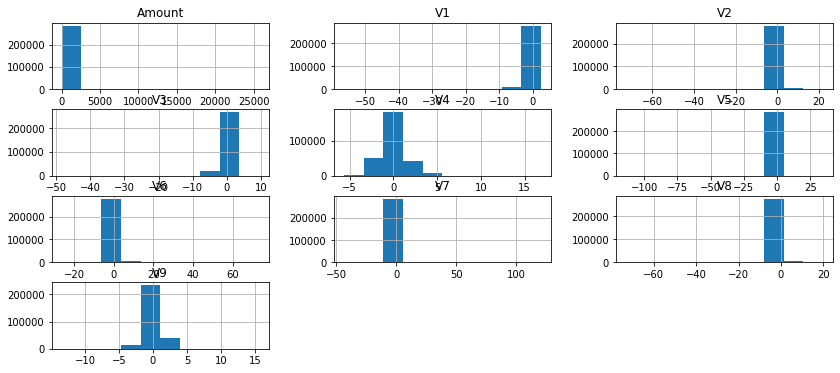

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X)

#Plot histogram again to view again the parameters:
X.hist(figsize = (14,6))
plt.show()

It is clearly seen in the above that all the features are now normally distributed around zero. I hope your concept is also cleared for data standardization. 

In [9]:
#X.describe()

## Supervised Machine Learning Model

First, we will split our dataset into train and test set using ‘train_test_split’ function. After that we will train our model and then we will predict using our trained model. In this example, we will use Logistic Regression model.

In [8]:
#Split the data set "train_test_split" function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

## Using Logistic Regression


### Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary). Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

In [9]:
#Instantiate the model to an empty object
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
LR = LogisticRegression()

#Train the model using "fit" method.
LR.fit(X_train, y_train)

#Test the model using "predict" method.
y_pred = LR.predict(X_test)


E:\Anaconda123\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Making Classification report and Confusion Matrix.

In [10]:
#print(classification_report(y_test,y_pred))
#Print the classification report & confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report is :--\n")
print(classification_report(y_test, y_pred))
print()

#For printing confusion matrix.
print("Confusion matrix is :--\n")
print(confusion_matrix(y_test, y_pred))
print()

#For finding accuracy.
from sklearn import metrics
#from sklearn.metrics import accuracy_score
print("Accuracy is :--\n",metrics.accuracy_score(y_test,y_pred))

Classification report is :--

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.82      0.38      0.51       144

    accuracy                           1.00     85443
   macro avg       0.91      0.69      0.76     85443
weighted avg       1.00      1.00      1.00     85443


Confusion matrix is :--

[[85287    12]
 [   90    54]]

Accuracy is :--
 0.9988062216916541


## Using Naive Bayes.

In [11]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

#Train the model using fit method.
gnb.fit(X_train,y_train)

#Test the model using predict method.
y_pred = gnb.predict(X_test)

# Making Classification report and Confusion Matrix.

In [12]:
#Print the classification report & confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report is :--\n")
print(classification_report(y_test, y_pred))
print()

#For printing confusion matrix.
print("Confusion matrix is :--\n")
print(confusion_matrix(y_test, y_pred))
print()

#For finding accuracy.
from sklearn import metrics
#from sklearn.metrics import accuracy_score
print("Accuracy is :--\n",metrics.accuracy_score(y_test,y_pred))

Classification report is :--

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85299
           1       0.05      0.58      0.09       144

    accuracy                           0.98     85443
   macro avg       0.52      0.78      0.54     85443
weighted avg       1.00      0.98      0.99     85443


Confusion matrix is :--

[[83594  1705]
 [   61    83]]

Accuracy is :--
 0.9793312500731481


## Using SVM

In [13]:
#from sklearn.svm import SVC
#supvec = SVC(gamma="auto")

#Train the model using fit method.
#supvec.fit(X_train,y_train)

#Test the model using predict method.
#y_pred = supvec.predict(X_test)

#Print the classification report & confusion matrix
#from sklearn.metrics import classification_report, confusion_matrix
#print("Classification report is :--\n")
#print(classification_report(y_test, y_pred))
#print()

#For printing confusion matrix.
#print("Confusion matrix is :--\n")
#print(confusion_matrix(y_test, y_pred))
#print()

#For finding accuracy.
#from sklearn import metrics
#from sklearn.metrics import accuracy_score
#print("Accuracy is :--\n",metrics.accuracy_score(y_test,y_pred))

## Let's convert the target values to Yes or No.

In [14]:
y_test.head()

148943    0
110204    0
120616    0
5861      0
201551    0
Name: Class, dtype: int64

In [15]:
y_test = pd.DataFrame(y)

In [16]:
y_test["Class"].replace(to_replace = [0, 1], value = ["No","Yes"], inplace = True)

# Unsupervised Outlier Detection

## 3. Unsupervised Outlier Detection

Now that we have processed our data, we can begin deploying our machine learning algorithms.  We will use the following techniques: 

**Local Outlier Factor (LOF)**

The anomaly score of each sample is called Local Outlier Factor. It measures the local deviation of density of a 
given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the 
object is with respect to the surrounding neighborhood.


**Isolation Forest Algorithm**

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting 
a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to 
isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees 
collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

In [19]:
# Determine number of fraud cases in dataset

Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))



0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


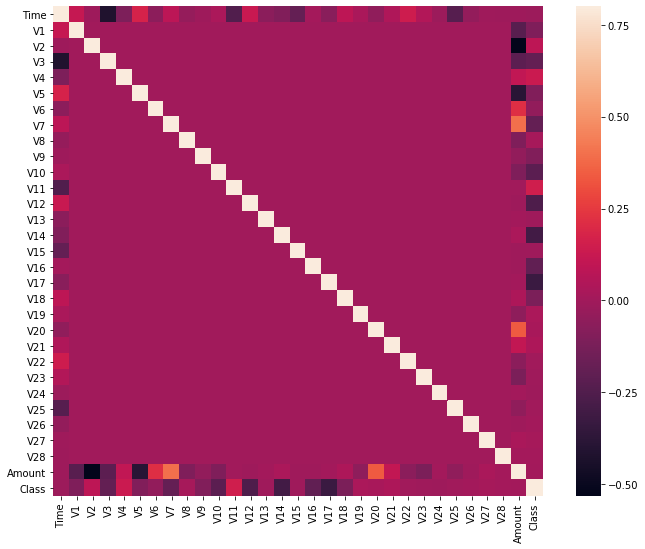

In [20]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [21]:
# Get all the columns from the dataFrame
columns = data.columns.tolist()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]

# Store the variable we'll be predicting on
target = "Class"

X = data[columns]
Y = data[target]

# Print shapes
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [22]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# define random states
state = 1

# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}

In [23]:
# Fit the model
plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))


E:\Anaconda123\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
E:\Anaconda123\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest: 645
0.997735308472053
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.34      0.35      0.35       492

    accuracy                           1.00    284807
   macro avg       0.67      0.67      0.67    284807
weighted avg       1.00      1.00      1.00    284807

Local Outlier Factor: 935
0.9967170750718908
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.05      0.05      0.05       492

    accuracy                           1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807



<Figure size 648x504 with 0 Axes>

## Conclusion

We get to know that we are getting accuracy = 99.90% which is approximately equal to 100% means very accurate in using Logistic Regression, after that I have used Naive Bayes classifier and got the accuracy around = 99.26% which is also not too bad, after that I have used SVM and got the accuracy around = 99.88%. So, I can conclude that I have used 3 different classifier for the same model and got the accuracy between the range 99 - 100, so I can proudly say that my model is good in predicting and is accurate.

# Prepared By :- Yash Kumar Jha